# Decision Tree and Random Forest

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Kaggle Data Download

In [2]:
!kaggle datasets list

ref                                                  title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                  Online Food Dataset                             3KB  2024-03-02 18:50:30          16538        326  0.9411765        
sukhmandeepsinghbrar/heart-attack-dataset            Heart Attack Dataset                           16KB  2024-03-30 05:14:35            930         22  1.0              
divu2001/coffee-shop-sales-analysis                  Coffee Shop Sales Analysis                      2MB  2024-03-30 10:57:57            956         27  1.0              
syedanwarafridi/vehicle-sales-data                   Vehicle Sales Data                             19MB  2024-02-21 20:16:17          23412     

In [4]:
!kaggle datasets download -d rashikrahmanpritom/heart-attack-analysis-prediction-dataset --force


  0%|          | 0.00/4.11k [00:00<?, ?B/s]
100%|██████████| 4.11k/4.11k [00:00<00:00, 2.19MB/s]


In [7]:
import zipfile

with zipfile.ZipFile('heart-attack-analysis-prediction-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

### Read File

[Dataset Description](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

About this dataset
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

* Value 1: typical angina
* Value 2: atypical angina
* Value 3: non-anginal pain
* Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

n

In [8]:
df = pd.read_csv("heart.csv")

In [9]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df["output"].unique()

array([1, 0], dtype=int64)

## Exploratory Data Analysis

In [13]:
ages_group = df.groupby('age').median().reset_index()

ages_group.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,29,1.0,1.0,130.0,204.0,0.0,0.0,202.0,0.0,0.00,2.0,0.0,2.0,1.0
1,34,0.5,2.0,118.0,196.0,0.0,0.5,183.0,0.0,0.35,2.0,0.0,2.0,1.0
2,35,1.0,0.0,124.0,195.0,0.0,1.0,165.0,0.5,0.70,2.0,0.0,2.5,0.5
3,37,0.5,2.0,125.0,232.5,0.0,1.0,178.5,0.0,1.75,1.0,0.0,2.0,1.0
4,38,1.0,2.0,138.0,175.0,0.0,1.0,173.0,0.0,0.00,2.0,4.0,2.0,1.0


<Axes: xlabel='age'>

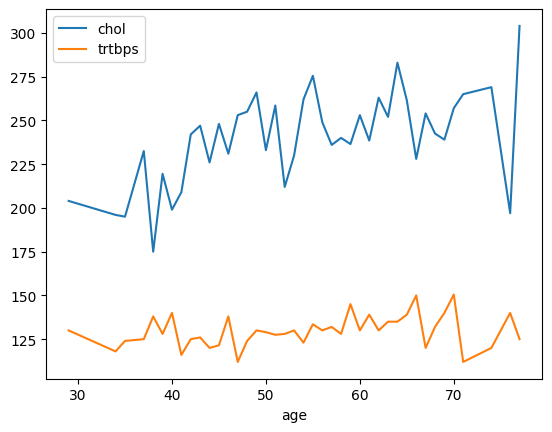

In [16]:
ages_group.plot.line("age", ["chol","trtbps"]) #", thalachh"])

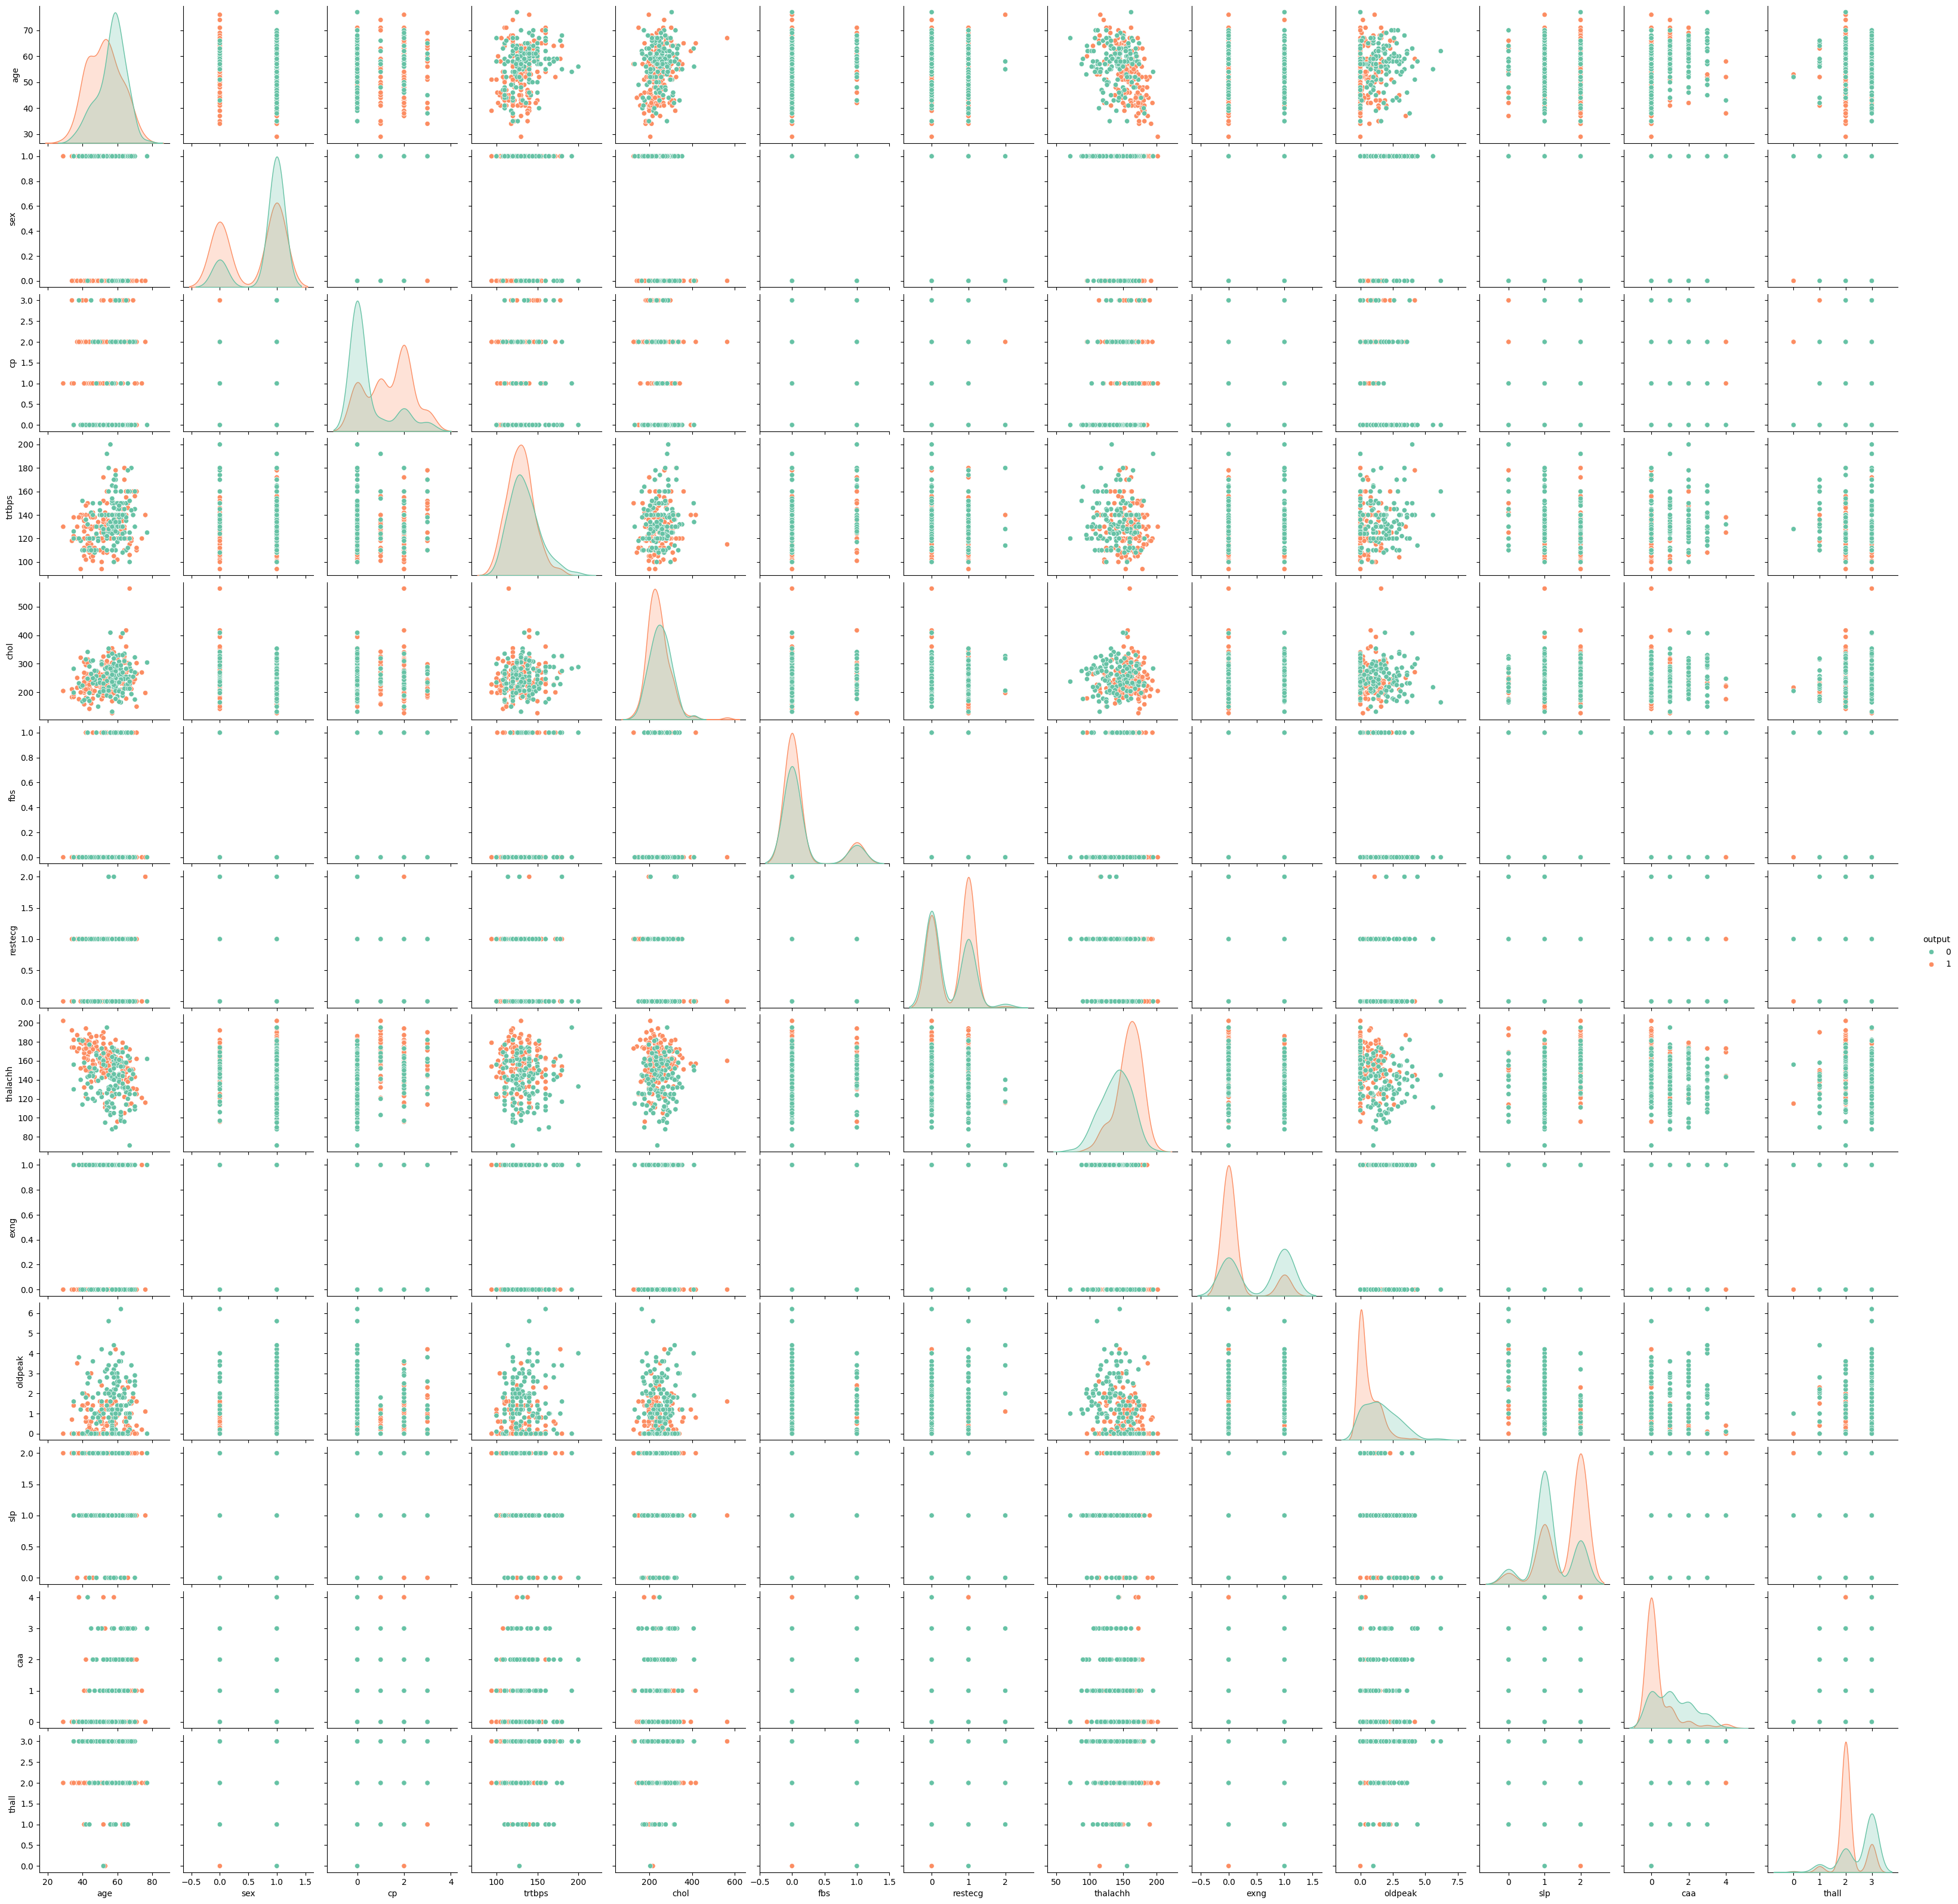

In [19]:
sns.pairplot(df, hue="output", palette= "Set2")

<Axes: >

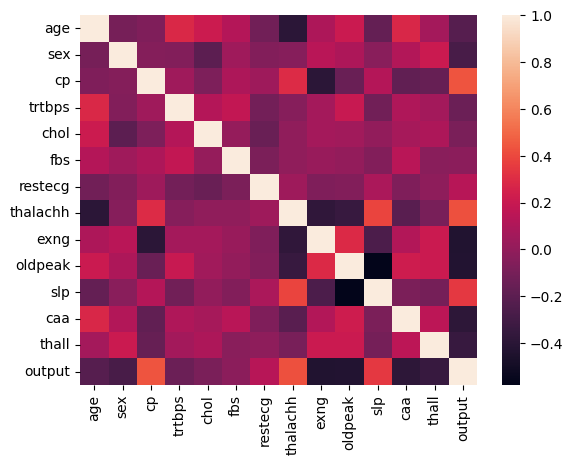

In [21]:
df.corr()
sns.heatmap(df.corr())

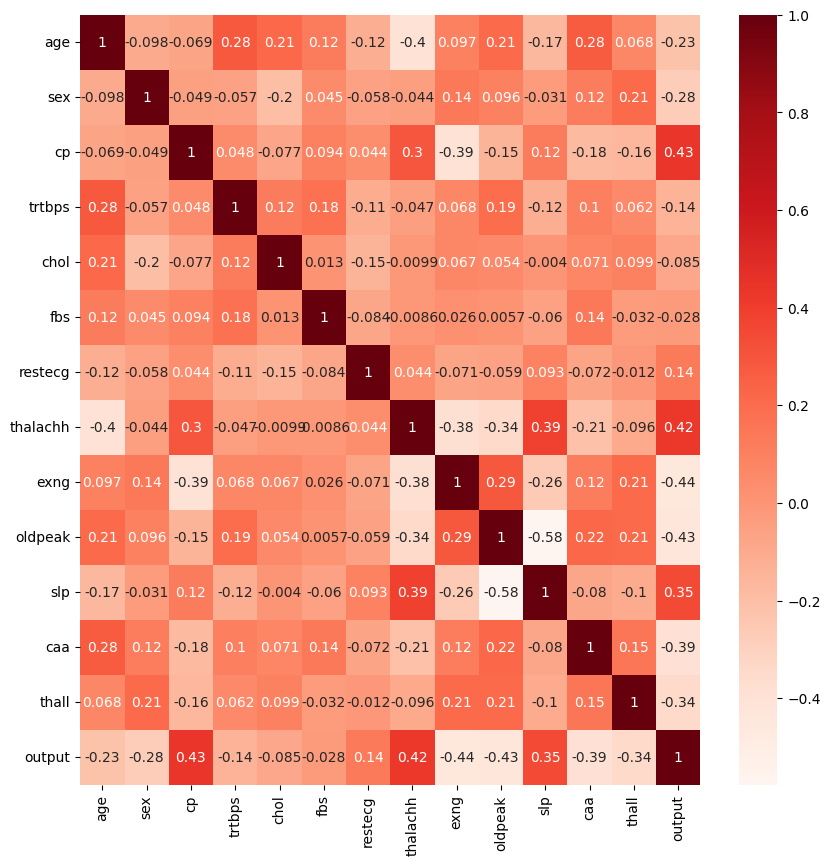

In [23]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [29]:
_ = df[df.columns].nunique();
display(pd.concat((df[df.columns].describe().transpose().drop(['count'], axis =1), _), axis=1).\
        rename(columns={0: 'nunique'}).style.format('{:,.2f}'));

,mean,std,min,25%,50%,75%,max,nunique
age,54.37,9.08,29.00,47.50,55.00,61.00,77.00,41.00
sex,0.68,0.47,0.00,0.00,1.00,1.00,1.00,2.00
cp,0.97,1.03,0.00,0.00,1.00,2.00,3.00,4.00
trtbps,131.62,17.54,94.00,120.00,130.00,140.00,200.00,49.00
chol,246.26,51.83,126.00,211.00,240.00,274.50,564.00,152.00
fbs,0.15,0.36,0.00,0.00,0.00,0.00,1.00,2.00
restecg,0.53,0.53,0.00,0.00,1.00,1.00,2.00,3.00
thalachh,149.65,22.91,71.00,133.50,153.00,166.00,202.00,91.00
exng,0.33,0.47,0.00,0.00,0.00,1.00,1.00,2.00
oldpeak,1.04,1.16,0.00,0.00,0.80,1.60,6.20,40.00


In [31]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [32]:
cat_cols=['sex', 'cp', 'fbs', 'restecg','exng', 'slp', 'caa', 'thall', 'output']
df[cat_cols] = df[cat_cols].astype('category')



In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trtbps    303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalachh  303 non-null    int64   
 8   exng      303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slp       303 non-null    category
 11  caa       303 non-null    category
 12  thall     303 non-null    category
 13  output    303 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 16.0 KB


In [46]:
def plot_graphs(data,feature, figsize=(12,7), kde=False):
    
# f2, (ax_box2, ax_hist2) = plt.subplots(
#     nrows=1,  # Number of rows
#     sharex=True,  # Share the x-axis
#     #gridspec_kw={"height_ratios": (0.25, 0.75)},  # Set the height ratios
#     figsize=figsize
    
    # creating subplots
    # plt.figsize=(12,7)
    # plt.title(f"Header: {feature}")
# check for integer type or categorical type before plotting
    # try:
    #     sns.countplot(data=data, x="output", hue=feature, ax=ax_box2)
    #     sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)
    # except:
    if data[feature].dtypes == 'int64':
        plt.figsize=(12,7)
        plt.title(f"Header: {feature}")
        sns.histplot(data=data, x=feature, kde=kde) #ax=ax_hist2)
        plt.show()
    else:
        plt.figsize=(12,7)
        sns.countplot(data=data, x="output", hue= feature) #, ax=ax_box2) 
        plt.title(f"Header: {feature}")
        plt.show()   

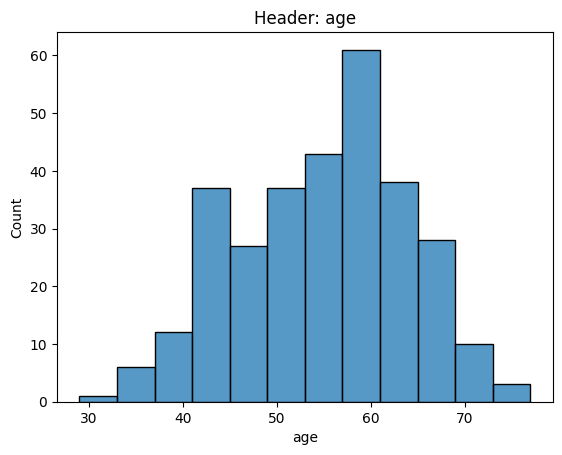

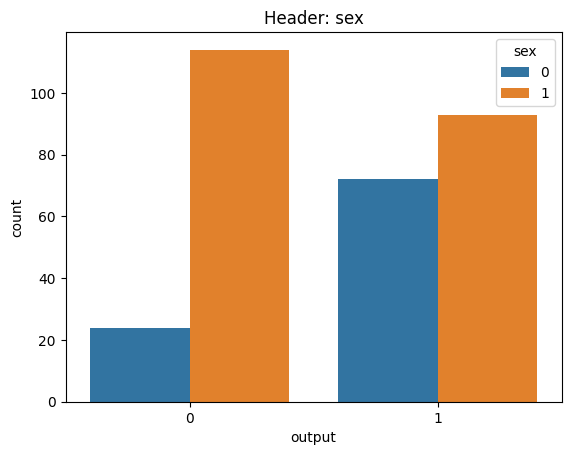

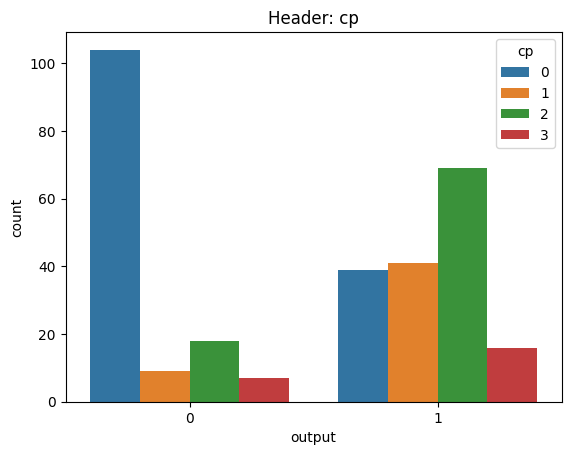

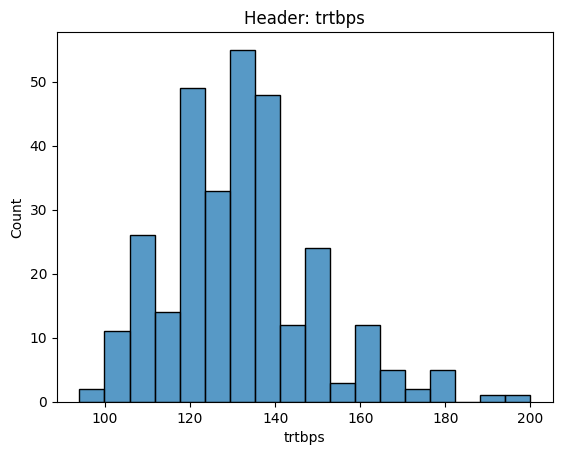

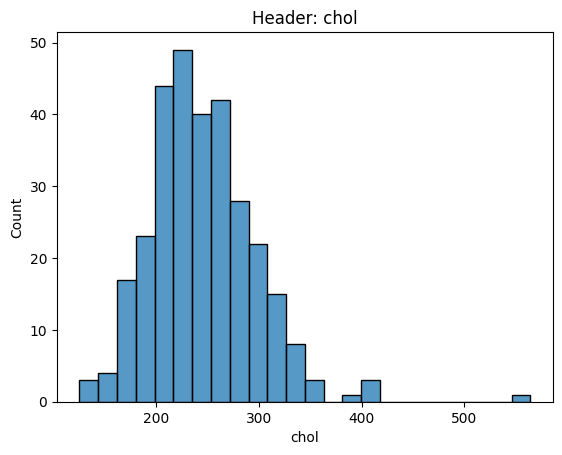

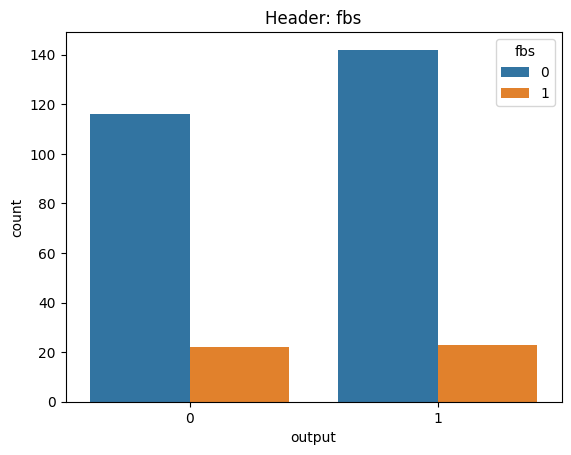

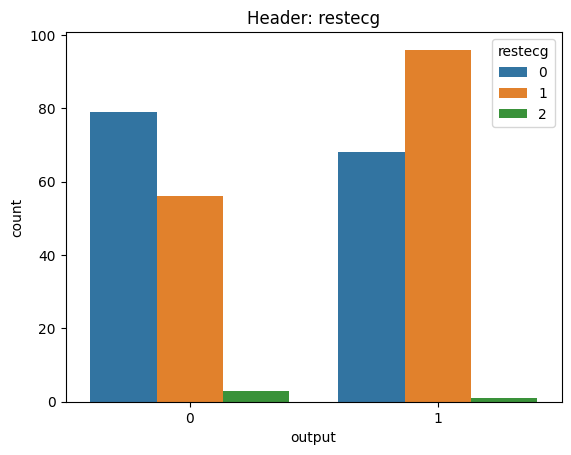

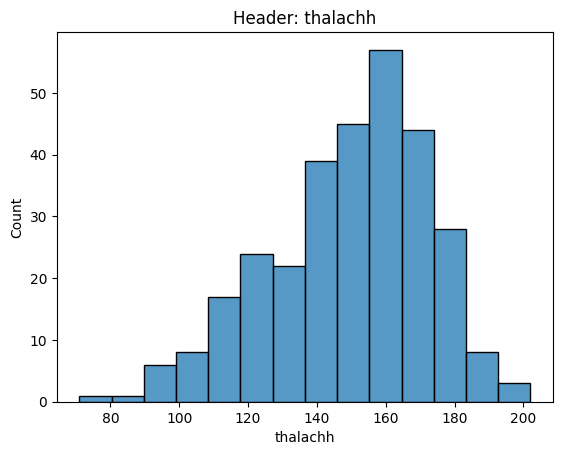

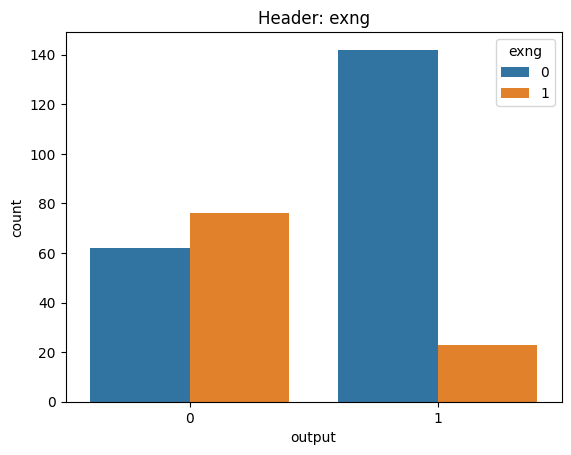

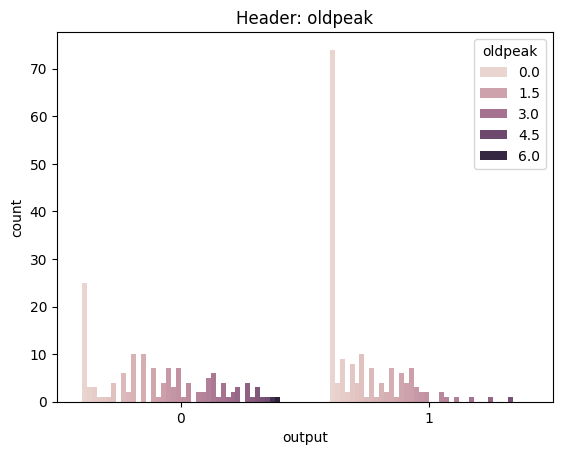

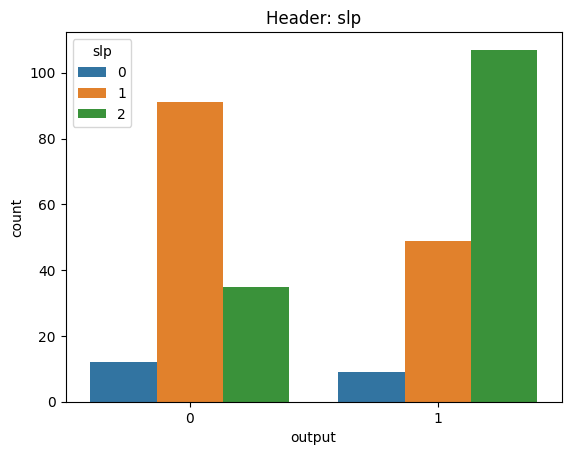

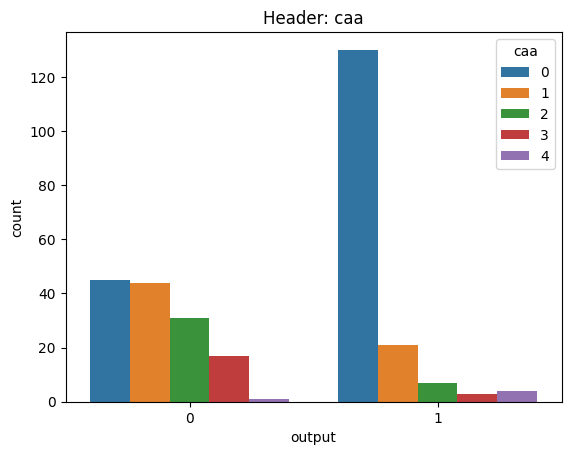

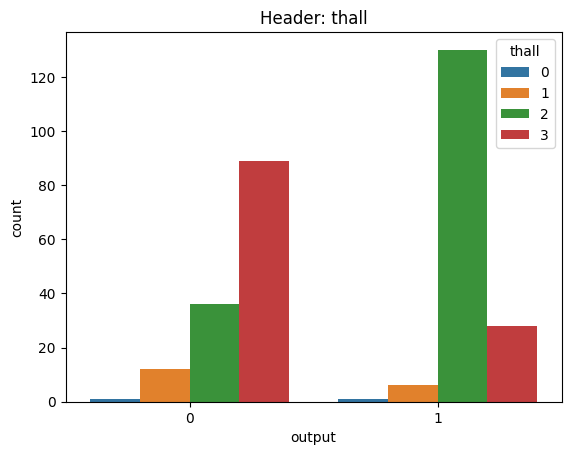

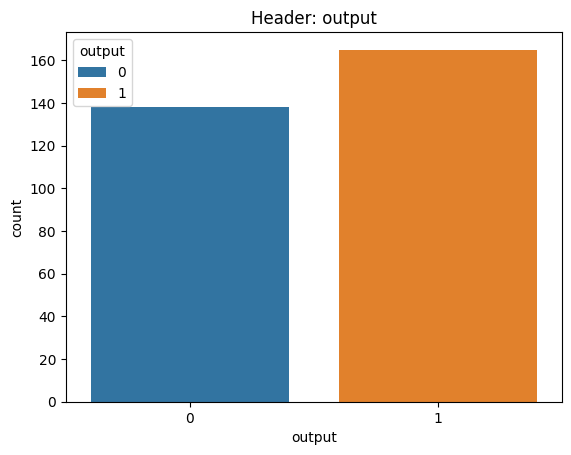

In [47]:
for col in df.columns :
    
    plot_graphs(df, col) #,kde=True)